<a href="https://colab.research.google.com/github/VIRU2341/alma-beetter-netflix/blob/main/NETFLIX_MOVIES_AND_TV_SHOWS_EDA_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - NETFLIX MOVIES AND TV SHOWS  Analysis



##### **Project Type**    - EDA
##### **Contribution**    - Individual
##### **Project By**      - Virendra Singh Rawat


# **Project Summary -**

Netflix is a subscription-based streaming service that allows the members to watch TV shows and movies on an internet-connected device.Depending on the plan, anyone can  download TV shows and movies to the iOS, Android, or Windows 10 device and watch without an internet connection.If you're already a member and would like to learn more about using Netflix, visit Getting started with Netflix.Netflix content varies by region and may change over time. We can watch a variety of award-winning Netflix originals, TV shows, movies, documentaries, and more.We can watch Netflix through any internet-connected device that offers the Netflix app, including smart TVs, game consoles, streaming media players, set-top boxes, smartphones, and tablets. We can also watch Netflix on your computer using an internet browser. We can review the  system requirements for web browser compatibility, and check our internet speed recommendations to achieve the best performance.Each Netflix plan determines the number of devices we can watch Netflix on at the same time and whether we can watch in High Definition (HD), Full High Definition (FHD), or Ultra High Definition (UHD).We can change your plan or cancel online at any time.

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Fixable which is a third-party Netflix search engine.  It will be interesting to explore what all other insights can be obtained from the same dataset.


# **GitHub Link -**

# **Problem Statement**


This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Fixable which is a third-party Netflix search engine. It will be interesting to explore what all other insights can be obtained from the same dataset.

#### **Define Your Business Objective?**

My task is to explore and analyse the data to understand what content is available in different countries and if Netflix has been increasingly focusing on TV rather than movies in recent years. And use these insights to cluster similar content by matching text-based features.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [114]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px   
import missingno


### Dataset Loading

In [115]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [116]:
df = pd.read_csv('/content/drive/MyDrive/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

### Dataset First View

In [117]:
# Dataset First Look
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [118]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


### Dataset Rows & Columns count

In [119]:
# Dataset Rows & Columns count
df.shape


(7787, 12)

In [120]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

### Dataset Information

In [121]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [122]:
# Dataset Duplicate Value Count
df.duplicated().sum()


0

In [123]:
df.shape

(7787, 12)

#### Missing Values/Null Values

In [124]:
# Missing Values/Null Values Count
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

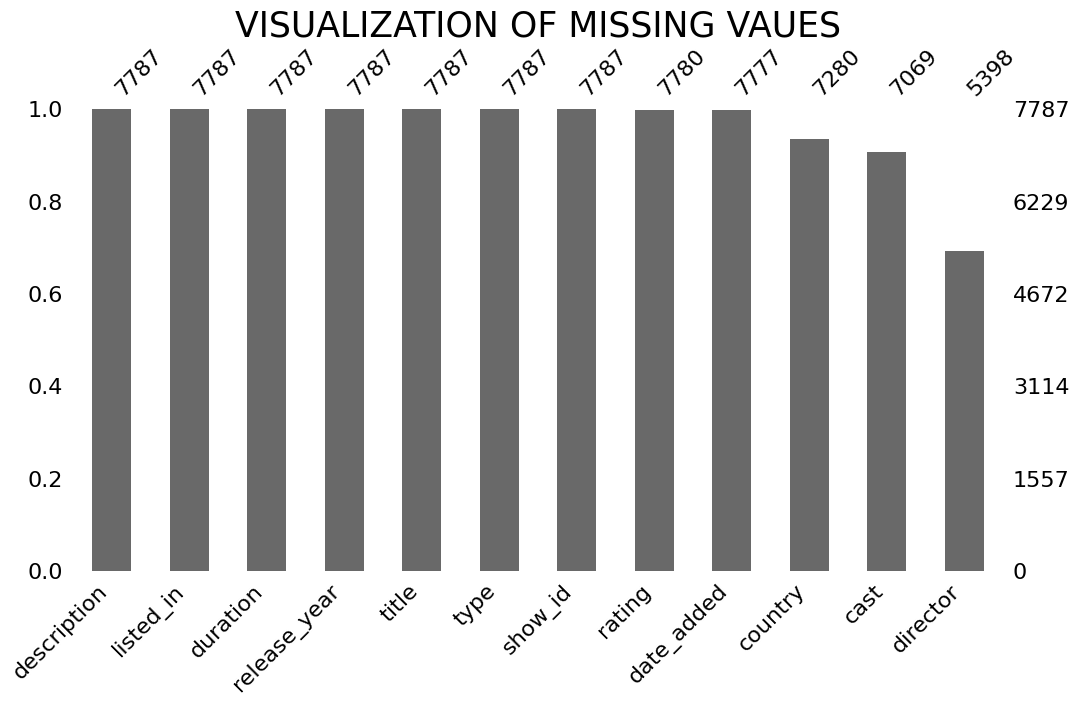

In [125]:
# Visualizing the missing values
missingno.bar(df,fontsize =16, sort = 'descending', figsize = (12,6))
plt.title("VISUALIZATION OF MISSING VAUES",fontsize=25)
plt.show()


### What did you know about your dataset?

From the above data we can see that there are 7787 rows and 12 columns.Most of the Values are Missing From Director Column and some of in Cast,Country and Date column.


## ***2. Understanding Your Variables***

In [126]:
# Dataset Columns
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [127]:
# Dataset Describe
df.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s1,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


### Variables Description 

**1. show_id** : Unique ID for every Movie / Tv Show

**2. type** : Identifier - A Movie or TV Show

**3. title** : Title of the Movie / Tv Show

**4. director** : Director of the Movie

**5. cast** : Actors involved in the movie / show

**6. country** : Country where the movie / show was produced

**7. date_added** : Date it was added on Netflix

**8. release_year** : Actual Releaseyear of the movie / show

**9. rating** : TV Rating of the movie / show

**10. duration** : Total Duration - in minutes or number of seasons

**11. listed_in** : Genere

**12. description**: The Summary description




### Check Unique Values for each variable.

In [128]:
pd.Series({col:df[col].unique() for col in df})
 

show_id         [s1, s2, s3, s4, s5, s6, s7, s8, s9, s10, s11,...
type                                             [TV Show, Movie]
title           [3%, 7:19, 23:59, 9, 21, 46, 122, 187, 706, 19...
director        [nan, Jorge Michel Grau, Gilbert Chan, Shane A...
cast            [João Miguel, Bianca Comparato, Michel Gomes, ...
country         [Brazil, Mexico, Singapore, United States, Tur...
date_added      [August 14, 2020, December 23, 2016, December ...
release_year    [2020, 2016, 2011, 2009, 2008, 2019, 1997, 201...
rating          [TV-MA, R, PG-13, TV-14, TV-PG, NR, TV-G, TV-Y...
duration        [4 Seasons, 93 min, 78 min, 80 min, 123 min, 1...
listed_in       [International TV Shows, TV Dramas, TV Sci-Fi ...
description     [In a future where the elite inhabit an island...
dtype: object

## 3. ***Data Wrangling***

### Data Wrangling Code

In [129]:
for i in df.columns.tolist():
  print("No. of unique values in ",i,"is",df[i].nunique(),".")

No. of unique values in  show_id is 7787 .
No. of unique values in  type is 2 .
No. of unique values in  title is 7787 .
No. of unique values in  director is 4049 .
No. of unique values in  cast is 6831 .
No. of unique values in  country is 681 .
No. of unique values in  date_added is 1565 .
No. of unique values in  release_year is 73 .
No. of unique values in  rating is 14 .
No. of unique values in  duration is 216 .
No. of unique values in  listed_in is 492 .
No. of unique values in  description is 7769 .


In [61]:
# Write your code to make your dataset analysis ready.
df["cast"]=df["cast"].fillna('unknown')
df["director"]=df["director"].fillna()
df["country"]=df["country"].fillna('unknown')
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])
df.dropna(axis=0, inplace = True)


In [130]:
#df["date_added"]=pd.DatetimeIndex(df.date_added)
df["year"]=pd.DatetimeIndex(df["date_added"]).year
df["month"]=pd.DatetimeIndex(df["date_added"]).month

In [131]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'year', 'month'],
      dtype='object')

In [132]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
year              10
month             10
dtype: int64

In [46]:
df.shape

(7777, 12)

In [99]:
df.shape

(7777, 14)

### What all manipulations have you done and insights you found?

**The manipulations are as follows**

1.There are 7777 rows and 12 columns.

2.In the dataset there is no duplicated values are there.

3.In that dataset this column null value there are director,cast ,country,date_added which has been replaced by unknown.

4.Two new columns have been added for month and year.




## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

Movie      5377
TV Show    2410
Name: type, dtype: int64


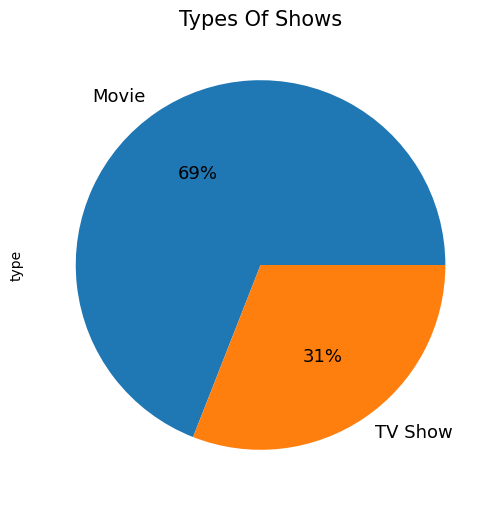

In [135]:
show_type=df["type"].value_counts()
print(show_type)
# Chart - 1 visualization code
show_type.plot(kind='pie',autopct='%1.0f%%',figsize=(15,6),fontsize=13)
plt.title("Types Of Shows",fontsize=15)
plt.show()

##### 1. Why did you pick the specific chart?

A pie chart is used to  display the different values of a given variable.

##### 2. What is/are the insight(s) found from the chart?

From the above chart it can be seen clearly that there are more movies 69% than TV shows 31% in the dataset.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The chart above shows that  there are about 5372 movies and almost 2398 TV shows, with movies being the majority. There are  more movie (69%) than TV shows  (31%) in terms of title.

#### Chart - 2

In [134]:
# Top countries
country=df.country.value_counts()
print(country)


 


United States                                                   2555
India                                                            923
United Kingdom                                                   397
Japan                                                            226
South Korea                                                      183
                                                                ... 
Russia, United States, China                                       1
Italy, Switzerland, France, Germany                                1
United States, United Kingdom, Canada                              1
United States, United Kingdom, Japan                               1
Sweden, Czech Republic, United Kingdom, Denmark, Netherlands       1
Name: country, Length: 681, dtype: int64


Text(0.5, 1.0, ' Top 20 countries with the highest number of shows')

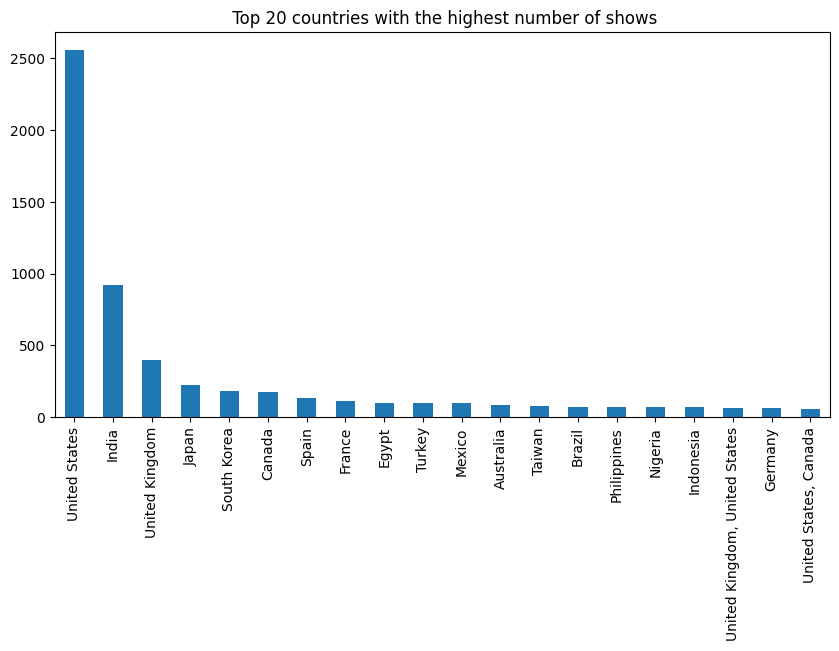

In [136]:
#  visualization code
plt.figure(figsize=(10,5))
df[~(df['country']=='Unknown')].country.value_counts().nlargest(20).plot(kind='bar')
plt.title(' Top 20 countries with the highest number of shows')

##### 1. Why did you pick the specific chart?

A bar plot shows catergorical data as rectangular bars with the height of bars proportional to the value they represent.

##### 2. What is/are the insight(s) found from the chart?

From the above chart we can see that  top 20 countries with the highest number movies / TV shows in the dataset.
\

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

 From the above chart United States are the top one country of highest number movies / TV shows in the dataset than in second position is India.


#### Chart - 3

Text(0.5, 1.0, 'distribution by released year')

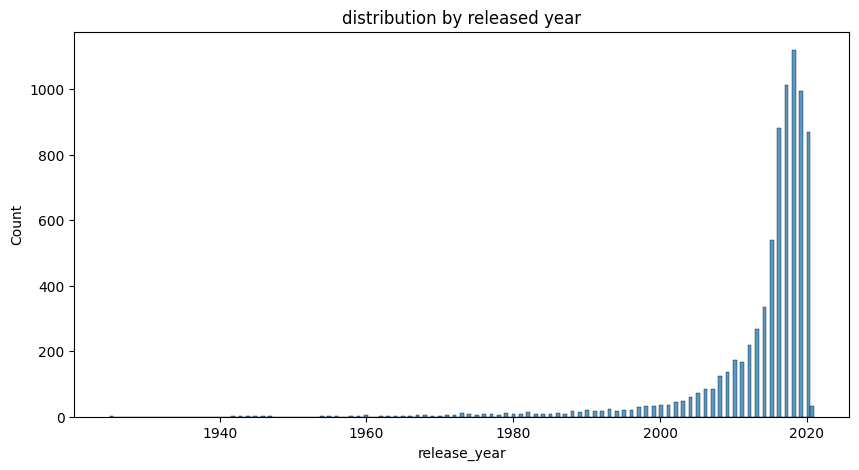

In [74]:
# Chart - 3 visualization code
plt.figure(figsize=(10,5))
sns.histplot(df['release_year'])
plt.title('distribution by released year')

##### 1. Why did you pick the specific chart?

A histogram is a graphical representation of the distribution of data. The histogram is represented by a set of rectangles, adjacent to each other, where each bar represent a kind of data.

##### 2. What is/are the insight(s) found from the chart?

From the above chart we found release_year 2000 to 2020 more the the movie / tv show was released.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

From the above chart it is clear that number of audience has increased from year 2000 to 2020.In last 4 to 5 years the audience is in peak.

#### Chart - 4

In [76]:
director=df["director"].value_counts()[1:12]
director

Raúl Campos, Jan Suter    18
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Jay Chapman               12
Youssef Chahine           12
Martin Scorsese           12
Steven Spielberg          10
David Dhawan               9
Lance Bangs                8
Johnnie To                 8
Name: director, dtype: int64

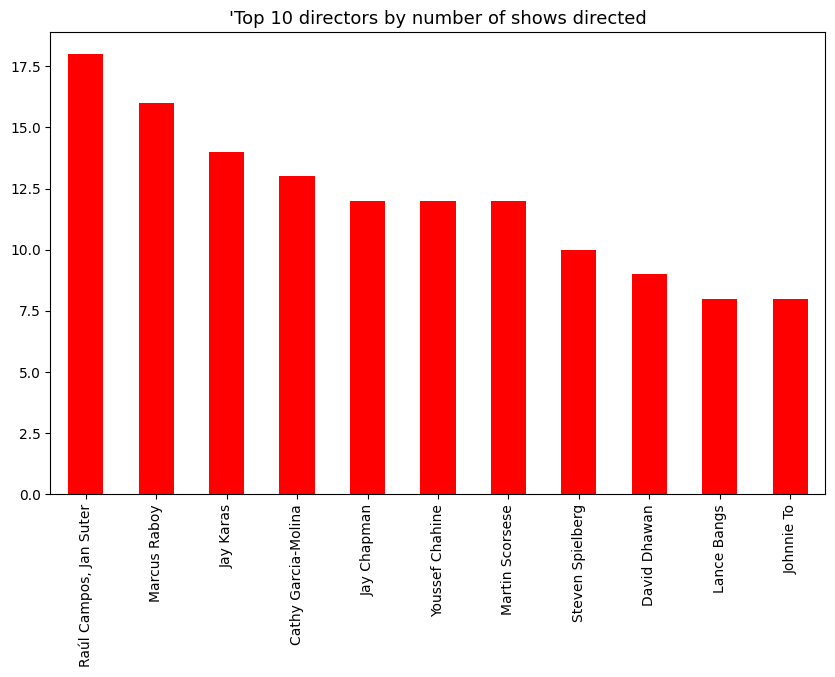

In [79]:
# Chart - 4 visualization code
director.plot(kind="bar",color='red',figsize=(10,6))
plt.title("'Top 10 directors by number of shows directed",fontsize=13)
plt.show()

##### 1. Why did you pick the specific chart?

 A barplot (or barchart) is one of the most common types of graphic. It shows the relationship between a numeric and a categoric variable.

##### 2. What is/are the insight(s) found from the chart?

In this Bar plot there are showing Top 10 directors by number of shows directed.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Raul Campos jan Suter are the top 1 director whereas Rayan Polito are top 10 director.

#### Chart - 5

<Axes: xlabel='rating', ylabel='count'>

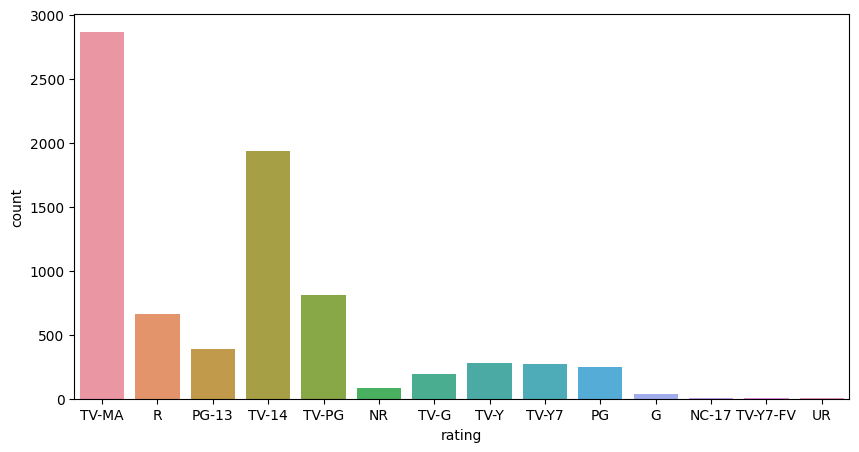

In [137]:
# Chart - 5 visualization code
plt.figure(figsize=(10,5))
sns.countplot(x='rating',data=df)

##### 1. Why did you pick the specific chart?

countplot() method is used to Show the counts of observations in each categorical bin using bars.

##### 2. What is/are the insight(s) found from the chart?

In this plot we found all rating count. TV-MA is the highest rating and second highest is TV-14 and third highest is TV-PG rating.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

TV-MA are the top 1 rating whereas UR ratings are in top 10.

#### Chart - 6

Text(0.5, 1.0, 'Top 10 genres')

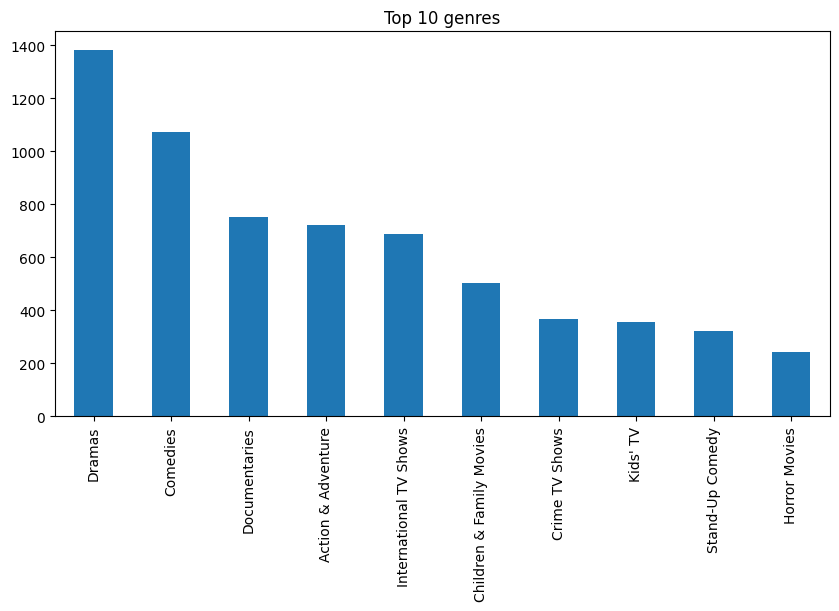

In [89]:
# Chart - 6 visualization code
plt.figure(figsize=(10,5))
df.listed_in.value_counts().nlargest(10).plot(kind='bar')
plt.title('Top 10 genres')
     

##### 1. Why did you pick the specific chart?

 A bar graph is a graphical representation of data in which we can highlight the category with particular shapes like a rectangle.

##### 2. What is/are the insight(s) found from the chart?

In this bar plot we found Dramas are large value_counts of shows and movies and Comedies are the second large value_counts of shows and Movies.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

In this bar plot we found Dramas are large value_counts of shows and movies and Comedies are the second large value_counts of shows and Movies.Audience are watching the dramas ,comedies and the documentation shows and movies.

#### Chart - 7

1 Season     1608
2 Seasons     382
3 Seasons     184
90 min        136
93 min        131
94 min        125
91 min        125
95 min        119
92 min        118
97 min        117
Name: duration, dtype: int64


Text(0.5, 1.0, 'Number of seasons per TV show distribution')

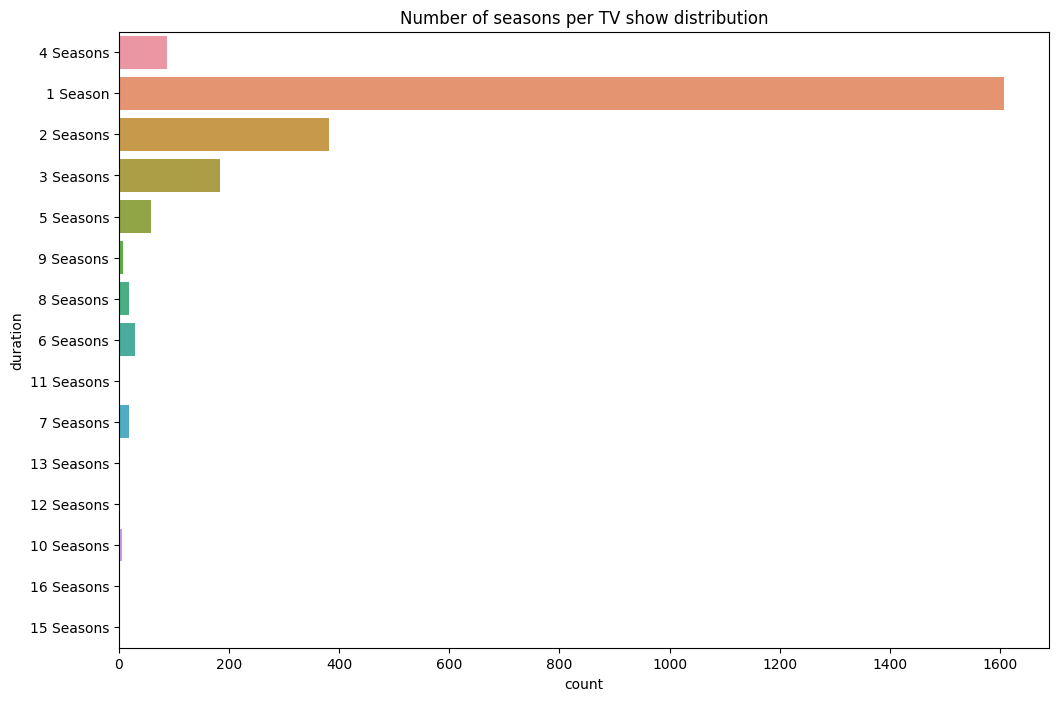

In [156]:
# Chart - 7 visualization code
duration=df['duration'].value_counts()[0:10]
print(duration)
# Seasons in each TV show
plt.figure(figsize=(12,8))
p = sns.countplot(y='duration',data=df[df['type']=='TV Show'])
plt.title('Number of seasons per TV show distribution')


     


##### 1. Why did you pick the specific chart?

A count plot can be thought of as a histogram across a categorical, instead of quantitative, variable. 

##### 2. What is/are the insight(s) found from the chart?

From the above bar chart  we found Number of per Seasons in each TV show count.first seasons are 1608 and second seasons are 378 and third seasons are 183.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The fiest season is the count is the highest 1608.The second season has 382 the third season has 184 and so on.

#### Chart - 8

Text(0.5, 1.0, 'Top 10 genres for movies')

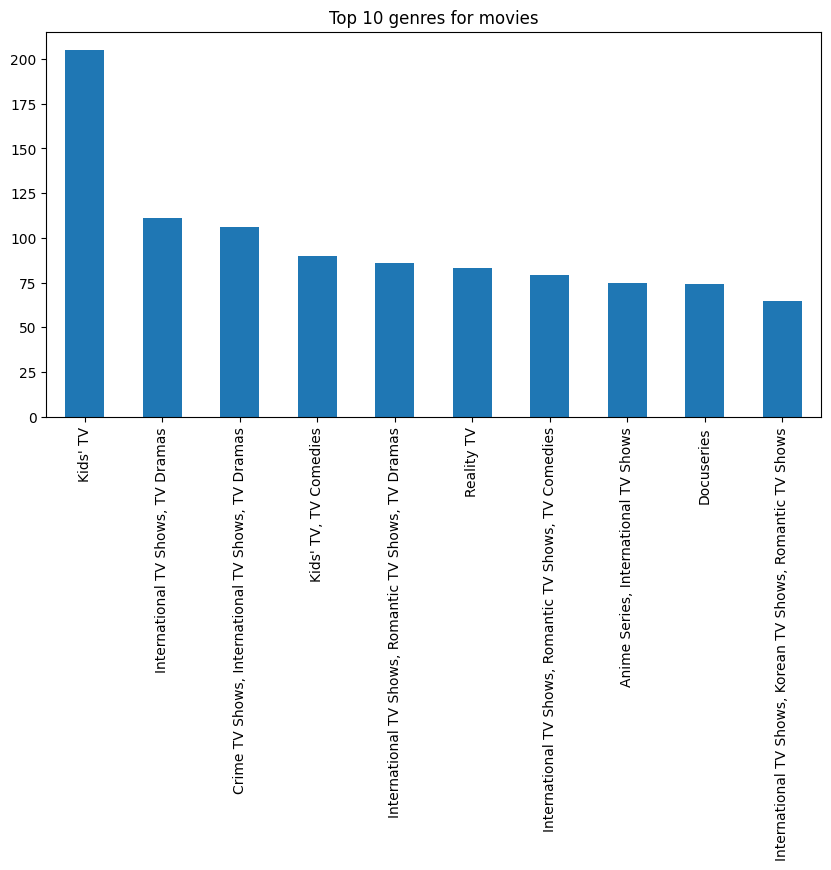

In [159]:
# Chart - 8 visualization code
# Top 10 genre for movies
plt.figure(figsize=(10,5))
df[df['type']=='TV Show'].listed_in.value_counts().nlargest(10).plot(kind='bar')
plt.title('Top 10 genres for movies')


##### 1. Why did you pick the specific chart?

A bar plot shows is often used to compare between values of different categories in the data.

##### 2. What is/are the insight(s) found from the chart?

In this graph we found Top 10 genres for movies.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Kid's Shows are the highest number of genres type of TV shows and International TV Shows ,Crime TVShows and Kid's Shows are approximately same for generes type of TV shows.

#### Chart - 9

Text(0.5, 1.0, 'Actors who have appeared in highest number of movies')

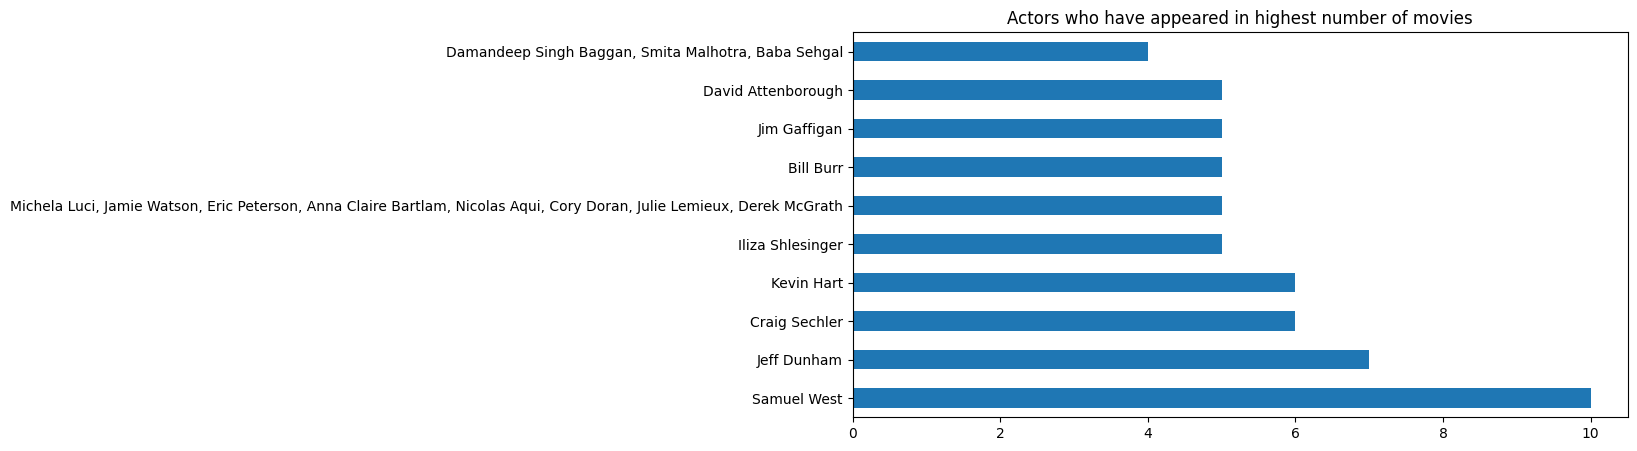

In [160]:
# Chart - 9 visualization code
# Top actors for movies
plt.figure(figsize=(10,5))
df[~(df['cast']=='Unknown') & (df['type']=='Movie')].cast.value_counts().nlargest(10).plot(kind='barh')
plt.title('Actors who have appeared in highest number of movies')

##### 1. Why did you pick the specific chart?

A bar plot shows is often used to compare between values of different categories in the data.

##### 2. What is/are the insight(s) found from the chart?

In this graph we found Top actors for movies.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Top one actor in movies are Samuel West and second highest actor are jeff Dunham and third highest actor of movies are Craig Sechler and Kevin Hart.

#### Chart - 10

Text(0.5, 1.0, 'Actors who have appeared in highest number of TV shows')

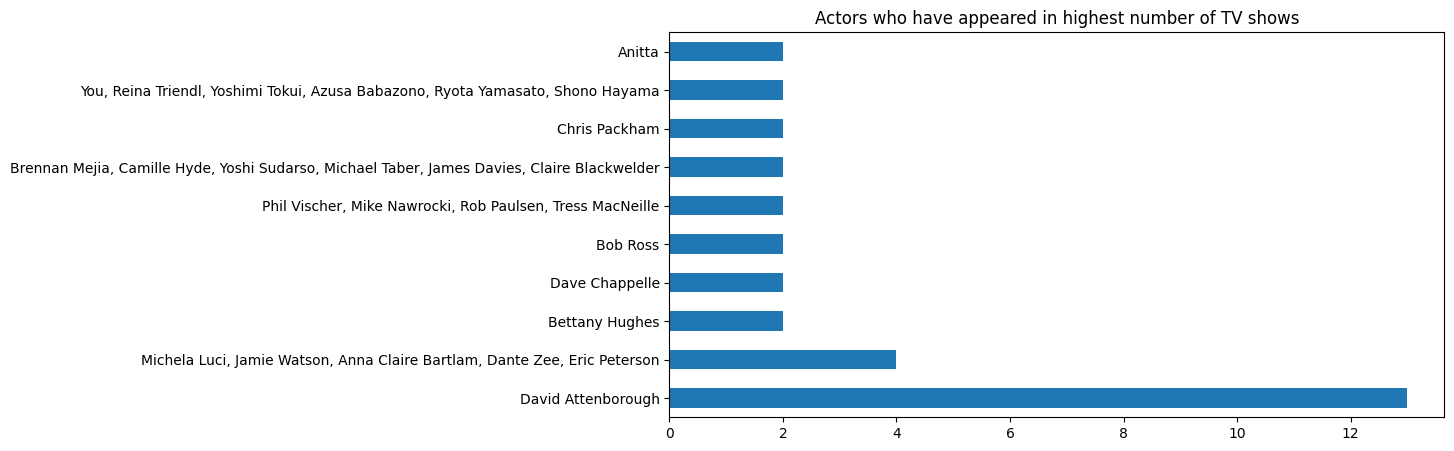

In [161]:
# Chart - 10 visualization code
# Top actors for TV shows
plt.figure(figsize=(10,5))
df[~(df['cast']=='Unknown') & (df['type']=='TV Show')].cast.value_counts().nlargest(10).plot(kind='barh')
plt.title('Actors who have appeared in highest number of TV shows')


##### 1. Why did you pick the specific chart?

To count and compare the  top actors for TV shows i use this bar chart.

##### 2. What is/are the insight(s) found from the chart?

In this graph we found Actors who have appeared highest number of TV shows. 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Top one actor of TV Shows is David Attenborough and second highest actor in TV shows many are there like Michela Luci,Jamie Watson,Anna Claire Bartlam,Dante Zee and Eric peterson.

#### Chart - 11

In [ ]:
wounded=df[["Target Type","Wounded"]].groupby("Target Type").sum().sort_values(by="Wounded",ascending=False)
wounded

,Wounded
Target Type,
Private Citizens & Property,177669.0
Military,70817.0
Police,64333.0
Business,54039.0
Government (General),40972.0
Transportation,40265.0
Religious Figures/Institutions,24326.0
Government (Diplomatic),10341.0
Educational Institution,10156.0


In [ ]:
killed=df[["Target Type","Killed"]].groupby("Target Type").sum().sort_values(by="Killed",ascending=False)
killed

,Killed
Target Type,
Private Citizens & Property,138956.0
Military,105299.0
Police,53120.0
Government (General),25940.0
Business,23391.0
Transportation,13821.0
Religious Figures/Institutions,13318.0
Terrorists/Non-State Militia,9027.0
Unknown,4004.0


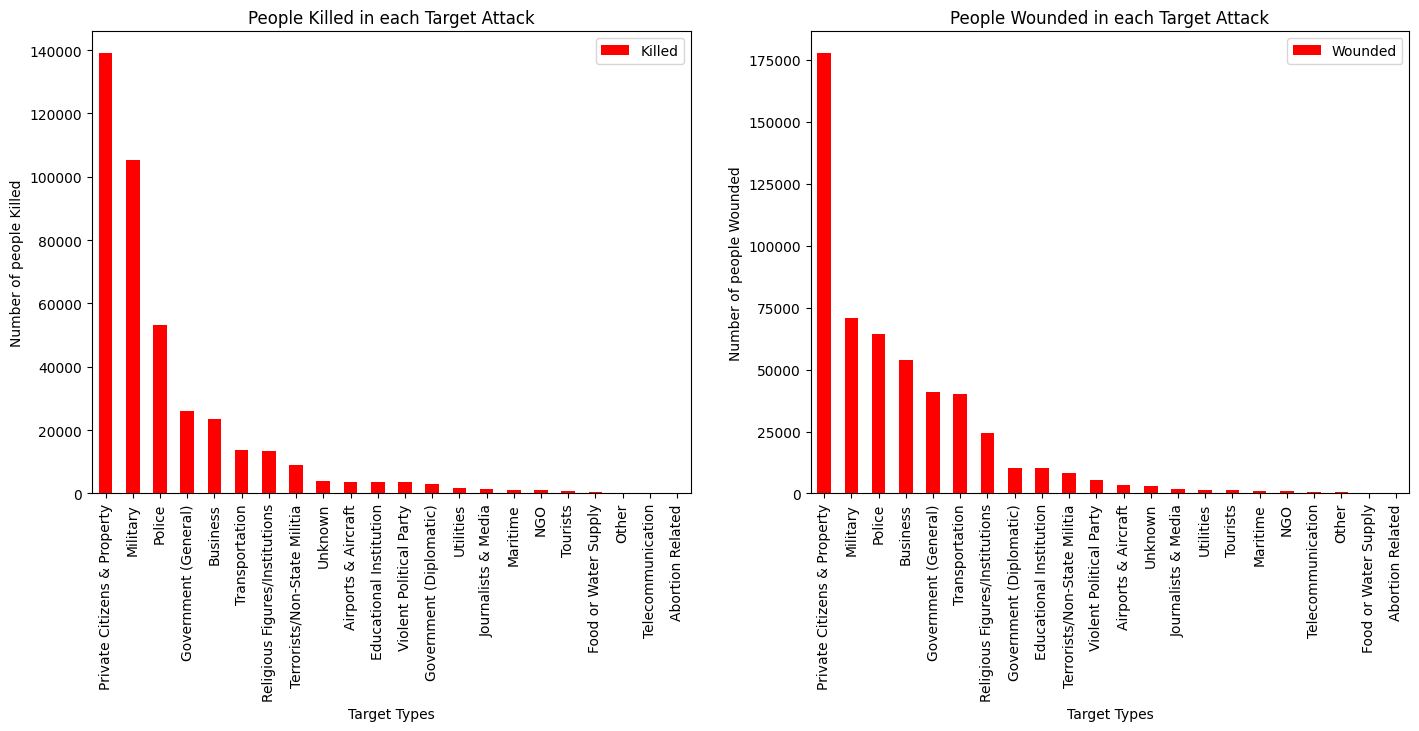

In [ ]:
# Chart - 11 visualization code
fig=plt.figure()
ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)

#Killed
killed.plot(kind="bar",color='red',figsize=(17,6),ax=ax0)
ax0.set_title("People Killed in each Target Attack")
ax0.set_xlabel("Target Types")
ax0.set_ylabel("Number of people Killed")

#Wounded
wounded.plot(kind="bar",color='red',figsize=(17,6),ax=ax1)
ax1.set_title("People Wounded in each Target Attack")
ax1.set_xlabel("Target Types")
ax1.set_ylabel("Number of people Wounded")
plt.show()

##### 1. Why did you pick the specific chart?

To count and compare the number of people killed and wounded on different target types i use this bar chart.

##### 2. What is/are the insight(s) found from the chart?

This insights shows that around 138956 people were killed on attacks in private citizens and 105299 were killed im military  and around 177669 people were injured in  in private citizens.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

From the above chart it is clear that the major casuality are on Private Citizens & Property,Military	,Police	,Business	and Government (General).

#### Chart - 12

In [ ]:
grpcountry=df[["Group Name","Country"]].value_counts().drop("Unknown")
grpcountry.head(10)

<ipython-input-43-d0751b0b5d34>:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  grpcountry=df[["Group Name","Country"]].value_counts().drop("Unknown")


Group Name                                        Country       
Taliban                                           Afghanistan       7249
Islamic State of Iraq and the Levant (ISIL)       Iraq              4400
Shining Path (SL)                                 Peru              3538
Al-Shabaab                                        Somalia           2852
New People's Army (NPA)                           Philippines       2691
Farabundo Marti National Liberation Front (FMLN)  El Salvador       2420
Revolutionary Armed Forces of Colombia (FARC)     Colombia          2341
Irish Republican Army (IRA)                       United Kingdom    2272
Kurdistan Workers' Party (PKK)                    Turkey            2061
Boko Haram                                        Nigeria           2058
dtype: int64

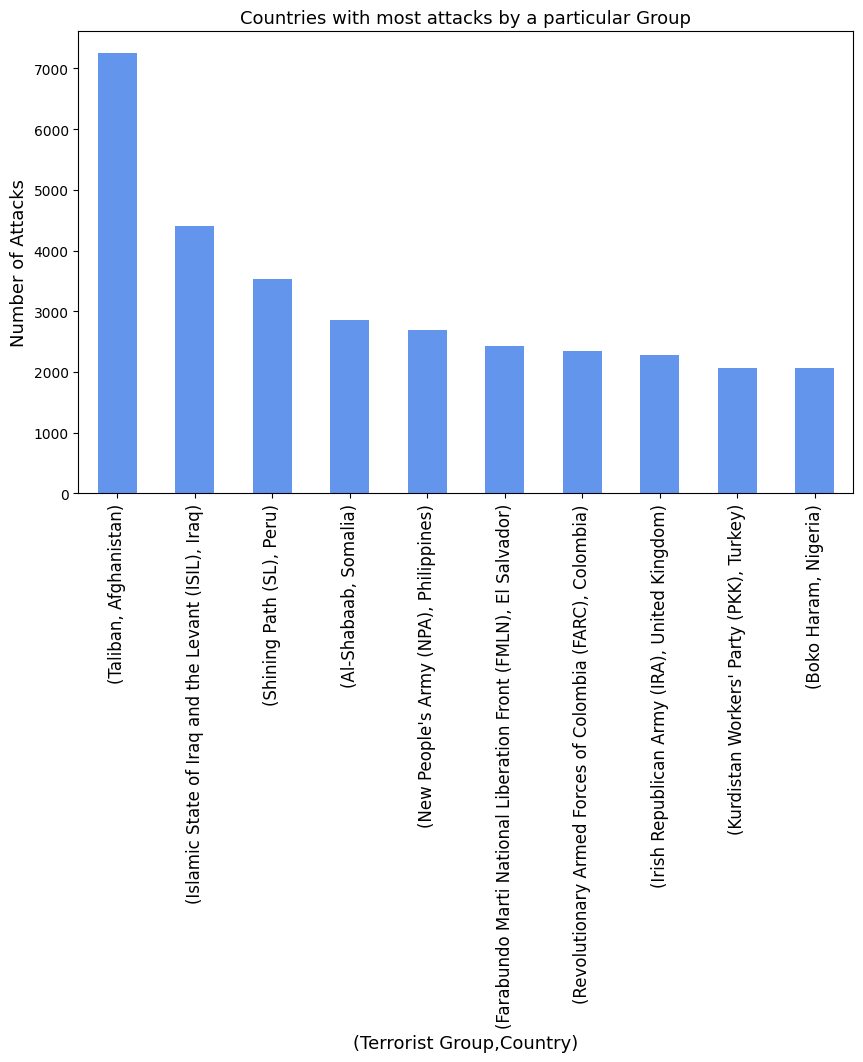

In [ ]:
# Chart - 12 visualization code
grpcountry.head(10).plot(kind="bar",color="cornflowerblue",figsize=(10,6))
plt.title("Countries with most attacks by a particular Group",fontsize=13)
plt.xlabel("(Terrorist Group,Country)",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Attacks",fontsize=13)
plt.show()

##### 1. Why did you pick the specific chart?

To count and compare the number of attacks by different group on different country  i use this bar chart.

##### 2. What is/are the insight(s) found from the chart?

This insights shows that the most terror are in Afghanistan by the terrorist group Taliban.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

From the above chart it is clear that the major country suffering from terror are  Afghanistan(7249) by Taliban,Iraq  by Islamic State of Iraq and the Levant (ISIL)(4400) and Peru by Shining Path (SL) (3538).                             

#### Chart - 13

In [ ]:
region=pd.crosstab(df.Year,df.Region)
region.head()

Region,Australasia & Oceania,Central America & Caribbean,Central Asia,East Asia,Eastern Europe,Middle East & North Africa,North America,South America,South Asia,Southeast Asia,Sub-Saharan Africa,Western Europe
Year,,,,,,,,,,,,
1970,1,7,0,2,12,27,460,62,1,10,3,48
1971,1,5,0,1,3,55,235,22,0,6,2,124
1972,5,3,0,0,1,48,72,21,1,12,2,353
1973,1,6,0,2,1,19,63,81,1,2,4,285
1974,1,11,0,4,2,38,105,60,2,3,7,310


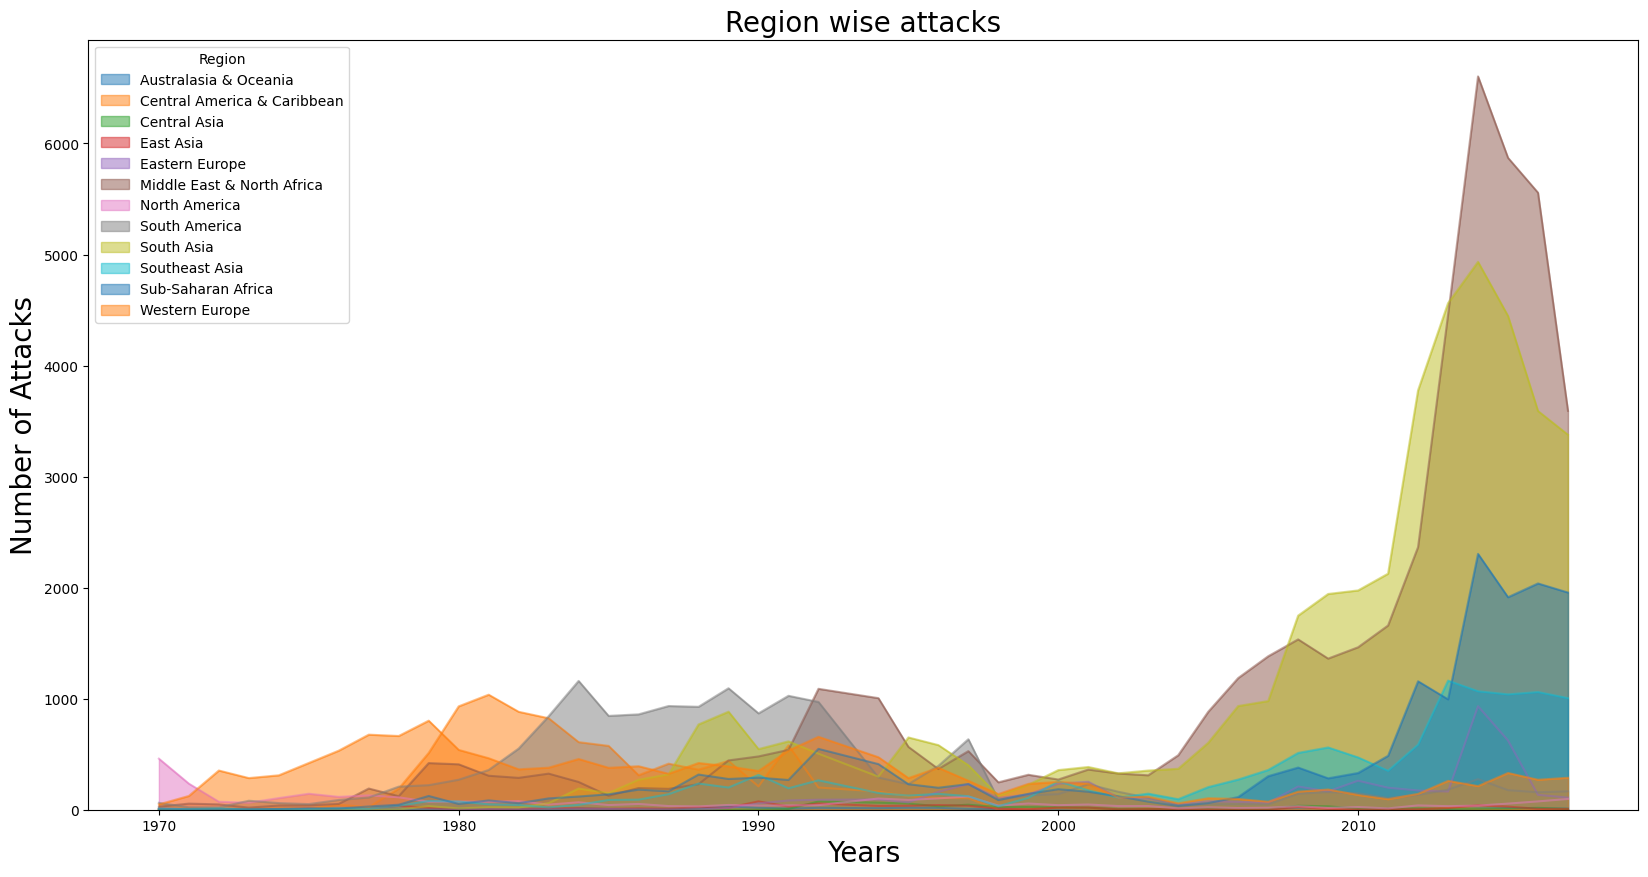

In [ ]:
# Chart - 13 visualization code
region.plot(kind="area", stacked=False, alpha=0.5,figsize=(20,10))
plt.title("Region wise attacks",fontsize=20)
plt.xlabel("Years",fontsize=20)
plt.ylabel("Number of Attacks",fontsize=20)
plt.show()

##### 1. Why did you pick the specific chart?

To compare the number of attacks done by terrorists in different region.

##### 2. What is/are the insight(s) found from the chart?

The insight is that Before 2001, the regions were much closer together in terms of activity, eventually all dropping to a minimum in 2000. After 2001, the Middle East and South Asia have dictated the rise in terrorism numbers, with a significant increase in Sub-Saharan Africa as well.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The insight lead The Middle East and North Africa Regions has most taregeted.After 2001, the Middle East and South Asia have dictated the rise in terrorism numbers, with a significant increase in Sub-Saharan Africa as well.

#### Chart - 14

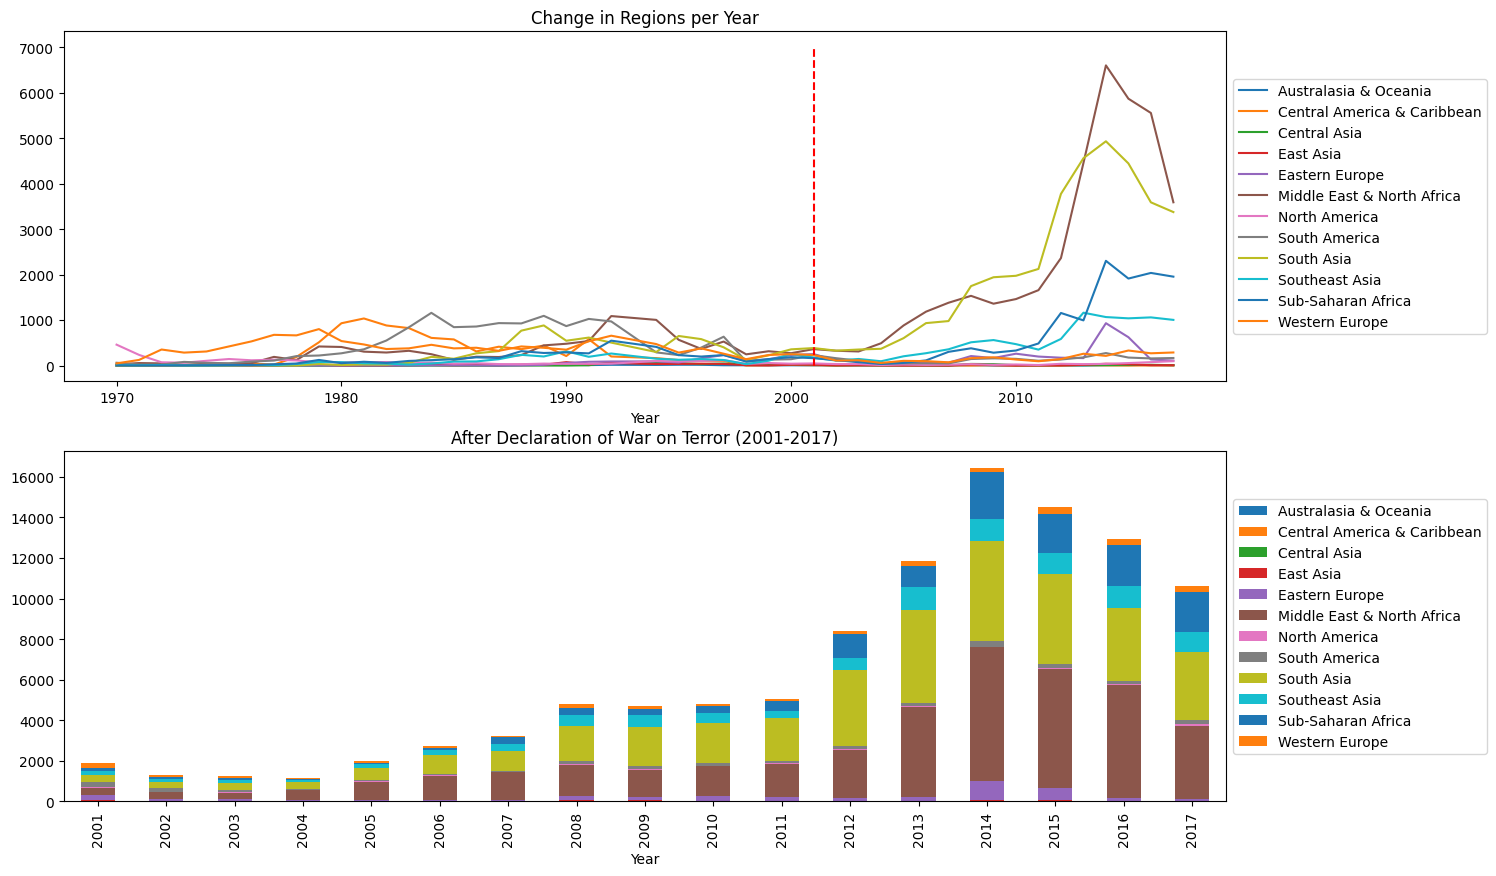

In [ ]:
# Chart - 14 visualization code
data_after = df[df['Year']>=2001]
fig,ax = plt.subplots(figsize=(15,10),nrows=2,ncols=1)
ax[0] = pd.crosstab(df.Year,df.Region).plot(ax=ax[0])
ax[0].set_title('Change in Regions per Year')
ax[0].legend(loc='center left',bbox_to_anchor = (1,0.5))
ax[0].vlines(x=2001,ymin=0,ymax=7000,colors='red',linestyles='--')
pd.crosstab(data_after.Year,data_after.Region).plot.bar(stacked=True,ax=ax[1])
ax[1].set_title('After Declaration of War on Terror (2001-2017)')
ax[1].legend(loc='center left',bbox_to_anchor = (1,0.5))
plt.show()

##### 1. Why did you pick the specific chart?

I have used this chart to compare the number of attacks done by terrorists in different region.

##### 2. What is/are the insight(s) found from the chart?

The insight is that Before 2001, the regions were much closer together in terms of activity, eventually all dropping to a minimum in 2000. After 2001, the Middle East and South Asia have dictated the rise in terrorism numbers, with a significant increase in Sub-Saharan Africa as well.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The insight lead The Middle East and North Africa Regions has most taregeted.After 2001, the Middle East and South Asia have dictated the rise in terrorism numbers, with a significant increase in Sub-Saharan Africa as well.

#### Chart - 15 - Correlation Heatmap

<ipython-input-30-0694197ee718>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap='RdYlGn')


<Axes: >

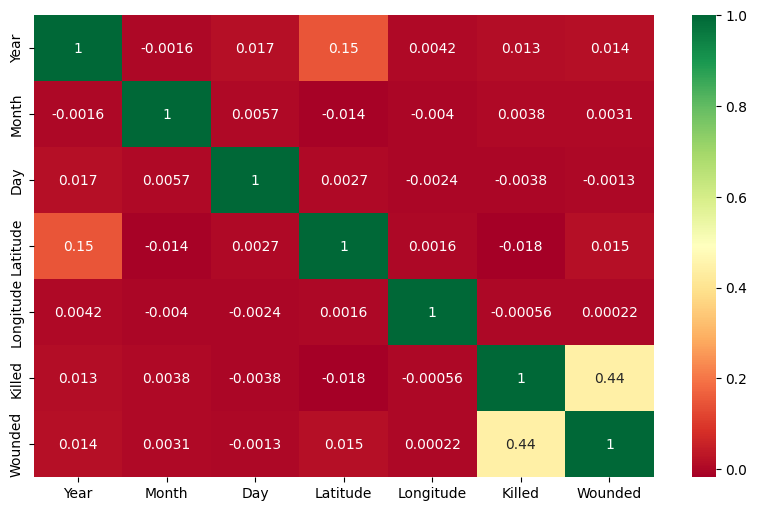

In [ ]:
# Correlation Heatmap visualization code
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn')

##### 1. Why did you pick the specific chart?

Correlation heatmaps was used to find potential relationships between variables and to understand the strength of these relationships.

##### 2. What is/are the insight(s) found from the chart?

The insight from the chart is that kiled is correlated to wounded which is obvious.There is no such strong coorelation.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ? 
Explain Briefly.

##1. When compared to attacks from 1970 onwards, the last 6 years scored a maximum.Government and security forces should look what wrong things are going from 2012 to 2017.

##2.The Middle East and North Africa Regions has most targeted.A strong policy against terrorists in this region should be made.

##3.Iraq,Pakistan and Afghanistan are the hub of terror where the most terror attacks are happened.Iraq with topmost.As the terror group like Taliban,ISIL are originated and controlled from these country only.Strict policy can be made by sending the militarty and ending the leaders of these terrorist group and a eye should be there so that no such terror group can be formed again.

##4..Maximum number of attacks are from Bombing/Explosions.Governments and security forces should investigate how and from where the terror group are getting these explosive and weapons.A team of bomb diffusive should be made and should be deployed in terror prone areas.

##5.The terrorist target the private Citizens and property  and then the  Military, Police, Government and so on.It is easier for terrorist to kill people and destroy the property.So a very strict checking should be done in cities like Bargdad where the attack is most.At every mall,crowded places, metro,airplane,transporated areas the checking should be done properly with proper bomb diffused team should be deployed and the maximum control of army and police should be their in cities like Barghdad.

# **Conclusion**

Insights derived from the above EDA we can conclude that:

1.Attacks has increased from 2012 to 2017 and number of people killed more in these years as attack happened.

2.Iraq has the most attacks.

3.The Middle East and North Africa Regions has most targeted.

4.Maximum number of attacks are from Bombing/Explosions.

5.There are maximum number of attacks in Private citizens and Property.

6.Taliban and ISIL has a most active organisation.

7.Private Citizens and Property were attacked most followed by Military, Police, Government and so on.
 
8.The State and City that was most affected was Baghdad.

9.In the last decade 2014 had most number of terror attacks.

10.The most common attack type was Bombing/Explosion.

11.Explosives have been consistently the most popular weapon of choice for terrorists.


### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***